#**CIS3715 Final Project: Drug Side Effect Prediction**
###Laura McDonnell - Sec 001


---



##1. Data Preprocessing

In [4]:
#import files
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

Mounted at /content/drive


Saving pubchem_fingerprints.txt to pubchem_fingerprints.txt
Saving go_annotations.txt to go_annotations.txt
Saving SIDER_drug_side_effects.txt to SIDER_drug_side_effects.txt
Saving gene_expression.txt to gene_expression.txt
Saving drug_domains.txt to drug_domains.txt


In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
chem = pd.read_csv("pubchem_fingerprints.txt", sep = "\t", header = 0, index_col = 0)
dom = pd.read_csv("drug_domains.txt", sep = "\t", header = 0, index_col = 0)
go = pd.read_csv("go_annotations.txt", sep = "\t", header = 0, index_col = 0)
expr = pd.read_csv("gene_expression.txt", sep = "\t", header = 0, index_col = 0)
side = pd.read_csv("SIDER_drug_side_effects.txt", sep = "\t", header = 0, index_col = 0)

#check data shape
print(chem.shape)
print(dom.shape)
print(go.shape)
print(expr.shape)
print(side.shape)

(501, 881)
(501, 1307)
(501, 3336)
(501, 978)
(501, 3260)


In [7]:
chem.head()

,sub0,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,...,sub871,sub872,sub873,sub874,sub875,sub876,sub877,sub878,sub879,sub880
1,,,,,,,,,,,,,,,,,,,,,
DB00158,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
DB00451,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
DB00988,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
DB00780,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
DB01069,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dom.head()

,IPR006114,IPR001723,IPR002089,IPR000436,IPR016449,IPR011304,IPR023753,IPR013312,IPR003439,IPR014784,...,IPR000215,IPR014371,IPR016244,IPR000907,IPR023796,IPR023173,IPR005438,IPR002471,IPR013083,IPR024548
DB00158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00451,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00988,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
DB00780,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB01069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
go.head()

,GO:0010044,GO:0071472,GO:0006626,GO:0021772,GO:2001300,GO:0097237,GO:0010881,GO:0030501,GO:0010875,GO:0006461,...,GO:0007631,GO:0060693,GO:0045726,GO:0030644,GO:0000729,GO:0002248,GO:0043299,GO:0006886,GO:0048839,GO:0042130
DB00158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00988,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
DB00780,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB01069,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
expr.head()

,gene780,gene7849,gene6193,gene23,gene9552,gene387,gene10921,gene10285,gene533,gene6194,...,gene54681,gene11000,gene6915,gene6253,gene7264,gene5467,gene2767,gene23038,gene57048,gene79716
DB00158,0.049180,0.000000,-0.114754,0.0,-0.032787,0.016393,-0.016393,-0.016393,0.000000,0.0,...,0.032787,0.081967,0.049180,-0.049180,0.000000,0.000000,0.000000,0.000000,0.065574,-0.032787
DB00451,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,...,0.000000,0.090909,0.000000,-0.090909,-0.090909,0.090909,0.000000,0.000000,0.000000,-0.181818
DB00988,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DB00780,0.000000,0.000000,-0.012346,0.0,-0.037037,0.012346,0.000000,0.012346,-0.012346,0.0,...,-0.012346,0.012346,0.037037,-0.012346,0.000000,0.012346,0.012346,0.037037,0.049383,-0.012346
DB01069,-0.047619,0.119048,-0.047619,0.0,0.000000,-0.047619,-0.047619,-0.023810,0.000000,0.0,...,0.119048,0.023810,0.000000,-0.023810,0.047619,0.047619,-0.023810,0.071429,0.166667,0.071429


In [199]:
drug_features = pd.concat([chem,dom,go,expr], axis=1)
pd.concat([chem,dom,go,expr], axis=1)

,sub0,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,...,gene54681,gene11000,gene6915,gene6253,gene7264,gene5467,gene2767,gene23038,gene57048,gene79716
DB00158,1,1,1,0,0,0,0,0,0,1,...,0.032787,0.081967,0.049180,-0.049180,0.000000,0.000000,0.000000,0.000000,0.065574,-0.032787
DB00451,1,1,0,0,0,0,0,0,0,1,...,0.000000,0.090909,0.000000,-0.090909,-0.090909,0.090909,0.000000,0.000000,0.000000,-0.181818
DB00988,1,1,0,0,0,0,0,0,0,1,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DB00780,1,1,0,0,0,0,0,0,0,1,...,-0.012346,0.012346,0.037037,-0.012346,0.000000,0.012346,0.012346,0.037037,0.049383,-0.012346
DB01069,1,1,1,0,0,0,0,0,0,1,...,0.119048,0.023810,0.000000,-0.023810,0.047619,0.047619,-0.023810,0.071429,0.166667,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB00390,1,1,1,1,0,0,0,0,0,1,...,0.000000,0.095238,0.071429,0.000000,-0.071429,0.071429,-0.023810,-0.047619,0.047619,-0.047619
DB00450,1,1,1,0,0,0,0,0,0,1,...,0.013158,0.039474,0.026316,-0.026316,-0.013158,0.065789,-0.013158,0.013158,0.013158,0.000000
DB00925,1,1,1,0,0,0,0,0,0,1,...,0.000000,0.095238,0.166667,0.023810,0.023810,0.023810,0.000000,0.023810,0.142857,-0.095238
DB01136,1,1,1,0,0,0,0,0,0,1,...,0.044444,0.000000,0.000000,0.000000,-0.111111,0.000000,0.000000,0.044444,0.022222,0.088889


In [ ]:
# all side effects data (target)
side.head()

,C0000737,C0687713,C0002418,C0002871,C0232462,C0003467,C0003811,C0004093,C0004238,C0004604,...,C0037293,C0948298,C0859978,C1096252,C1504438,C0424082,C0018994,C0398625,C0023480,C0280313
1,,,,,,,,,,,,,,,,,,,,,
DB00158,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00451,1,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00988,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
DB00780,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
DB01069,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# we will be predicting one side effect at a time
# start with C0000737 : abdominal pain
side['C0000737'].head()

1
DB00158    0
DB00451    1
DB00988    0
DB00780    0
DB01069    0
Name: C0000737, dtype: int64

In [9]:
counts = side['C0000737'].value_counts()
print(counts)

C0000737
1    302
0    199
Name: count, dtype: int64


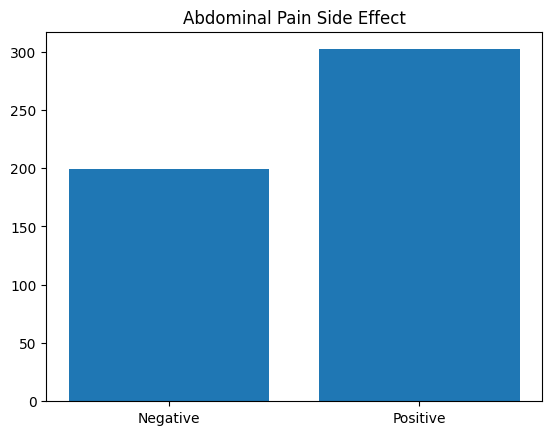

In [10]:
# Check whether the dataset is balanced or not
import matplotlib.pyplot as plt

# Number of positive / negative samples
counts = side['C0000737'].value_counts()

# Plot counts using a bar plot
plt.bar(counts.index, counts.values)
plt.title('Abdominal Pain Side Effect')
plt.xticks(counts.index, ['Positive', 'Negative'])
plt.show()

In [200]:
#check for missing values, categorical features
print(drug_features.isnull().sum())
print(side.isnull().sum())

sub0         0
sub1         0
sub2         0
sub3         0
sub4         0
            ..
gene5467     0
gene2767     0
gene23038    0
gene57048    0
gene79716    0
Length: 6502, dtype: int64
C0000737    0
C0687713    0
C0002418    0
C0002871    0
C0232462    0
           ..
C0424082    0
C0018994    0
C0398625    0
C0023480    0
C0280313    0
Length: 3260, dtype: int64


- there are no missing values
- there are no categorical features

###PCA for dimensionality reduction


In [201]:
from sklearn.decomposition import PCA
print('number of original features: {}'.format(drug_features.shape[1]))

# Reduce into 200 features
pca = PCA(n_components=200)
X_r = pca.fit(drug_features).transform(drug_features)

print('number of new features: {}'.format(X_r.shape[1]))

number of original features: 6502
number of new features: 200


In [202]:
df = pd.DataFrame(X_r)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.246605,5.846645,0.633051,-0.283179,-0.078267,-2.381784,-0.971794,-0.464959,1.650101,-1.855028,...,-0.243121,0.250081,0.099688,-0.068055,-0.099575,0.284951,0.106369,0.147828,-0.258144,-0.011791
1,-2.680137,-2.066405,-3.170406,-0.669026,-0.515073,0.354554,-0.260065,-0.715165,-0.917483,-0.515439,...,-0.177110,-0.238301,-0.180285,0.161855,0.152143,-0.410436,-0.277446,0.526327,-0.007992,-0.358496
2,7.370210,-6.640912,-0.422582,-0.966616,0.455300,-1.010306,-0.440916,-1.809250,-5.090389,-0.645935,...,-0.380723,-0.182458,-0.385093,-0.068291,0.186872,0.341698,-0.118454,-0.163652,-0.072594,0.329580
3,-1.176061,-1.752329,1.811065,2.323372,-1.702223,1.719760,0.421757,0.606802,-0.904429,-0.791522,...,-0.237363,0.136596,-0.649204,0.430553,0.342850,-0.216520,-0.078663,0.303053,-0.034418,0.191106
4,9.520836,-3.817477,2.939381,1.230341,-1.211222,-0.489834,-0.809456,-1.187016,-1.703535,0.225907,...,-0.311383,0.013268,-0.256373,0.083328,0.079760,0.349253,0.330196,0.187705,-0.033570,0.267086


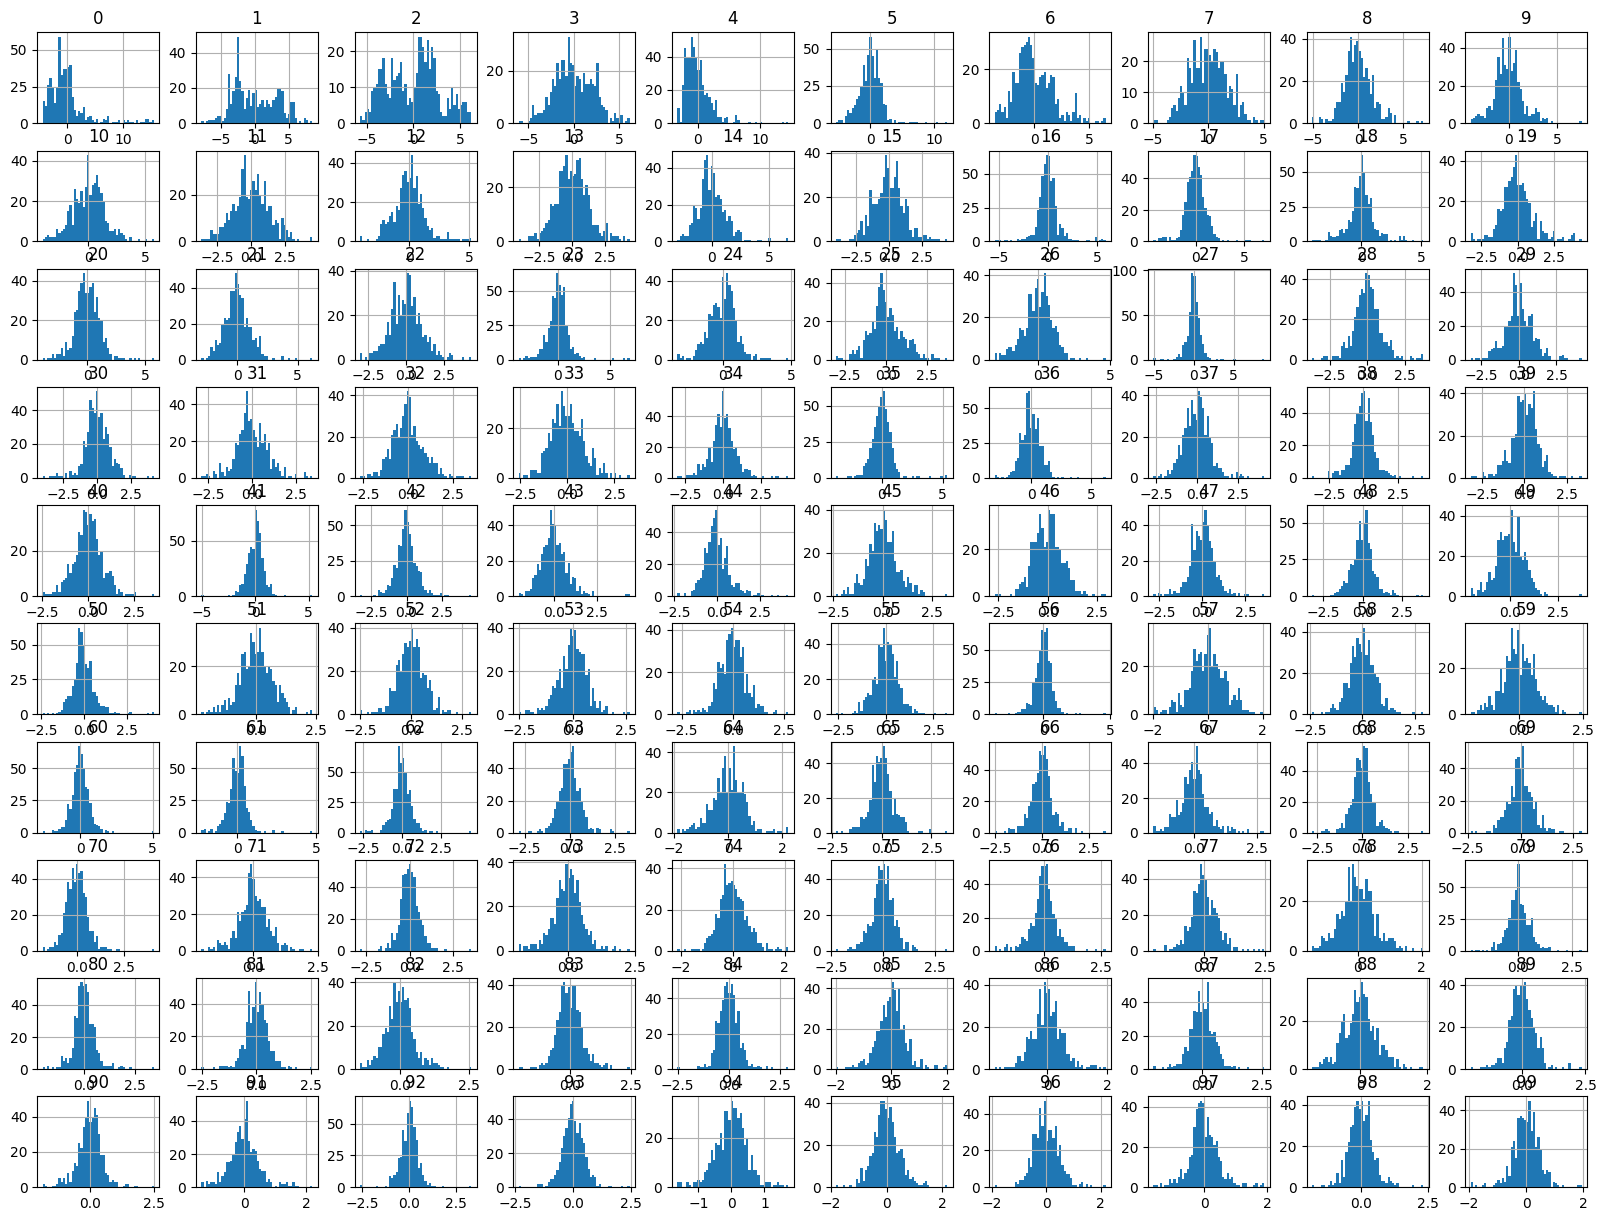

In [52]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [203]:
# Normalize all numerical features
df_min = df.min(axis=0)
df_max = df.max(axis=0)
print("\tMin: ")
print(df_min)
print("\n\tMax: ")
print(df_max)

X = (df - df_min) / (df_max - df_min)

	Min: 
0     -4.455311
1     -7.849647
2     -5.724021
3     -6.072429
4     -3.311336
         ...   
195   -1.098069
196   -1.258886
197   -1.162693
198   -0.946071
199   -0.962952
Length: 200, dtype: float64

	Max: 
0      15.533340
1       8.508103
2       6.193939
3       6.250253
4      14.516212
         ...    
195     1.158544
196     1.459091
197     1.192353
198     1.228732
199     1.236515
Length: 200, dtype: float64


In [157]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.292969,0.102203,0.521616,0.487499,0.191590,0.124244,0.283483,0.529203,0.631479,0.230101,...,0.426608,0.532627,0.492381,0.480733,0.477501,0.485916,0.443209,0.502483,0.483089,0.892402
1,0.103716,0.570685,0.199158,0.518048,0.128820,0.291827,0.361813,0.571462,0.398231,0.344095,...,0.385105,0.586205,0.468778,0.459504,0.463936,0.483146,0.438565,0.490002,0.471830,0.881353
2,0.580320,0.909333,0.430973,0.582874,0.186158,0.207389,0.355763,0.635721,0.055105,0.217727,...,0.410098,0.474136,0.486790,0.474840,0.439786,0.468850,0.441342,0.498877,0.487057,0.879581
3,0.180988,0.566446,0.620621,0.242514,0.096797,0.373353,0.406095,0.427716,0.400016,0.306299,...,0.408715,0.494370,0.481082,0.469067,0.474048,0.474355,0.449068,0.497840,0.480204,0.878188
4,0.706803,0.749285,0.722679,0.351879,0.114359,0.232837,0.308226,0.600596,0.306059,0.514157,...,0.396064,0.370314,0.516086,0.484869,0.507298,0.495491,0.450157,0.511426,0.473094,0.847088


###Split the preprocessed dataset into training set and testing set

In [204]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,
                                                 side['C0000737'], # code 'C0000737' = adbominal pain
                                                 test_size=0.20,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)

(400, 200)
(101, 200)


##2. Model Selection

###Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

#=====training with cross validation======
coeff = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100]
param_grid = dict(C = coeff)

clf_lr = LogisticRegression(penalty = 'l2', max_iter=1000)

grid = GridSearchCV(clf_lr, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train, y_train)

print(grid.best_params_)

{'C': 0.1}


In [206]:
# test
from sklearn.metrics import precision_score, recall_score
clf_lr = LogisticRegression(penalty='l2', C = grid.best_params_['C'], max_iter=1000)
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

# performance

acc = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
micro_f1 = f1_score(y_test, y_pred, average = 'micro')

precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)

print('acc: {}, macro_f1: {}, micro_f1: {}, precision: {}, recall: {}'.format(acc, macro_f1, micro_f1, precision, recall))

acc: 0.6237623762376238, macro_f1: 0.3841463414634147, micro_f1: 0.6237623762376238, precision: 0.32142857142857145, recall: 0.4772727272727273


###KNN

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 10)
param_grid = dict(n_neighbors = k_range)

clf_knn =  KNeighborsClassifier(n_neighbors = 1)

grid = GridSearchCV(clf_knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': range(1, 10)}, scoring='accuracy')

In [208]:
print(grid.best_score_)
print(grid.best_params_)

0.5275000000000001
{'n_neighbors': 1}


In [209]:
# test
clf_knn =  KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'])
clf_knn.fit(X_train, y_train)

y_pred = clf_knn.predict(X_test)

# performance
acc = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
micro_f1 = f1_score(y_test, y_pred, average = 'micro')

precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)

print('acc: {}, macro_f1: {}, micro_f1: {}, precision: {}, recall: {}'.format(acc, macro_f1, micro_f1, precision, recall))

acc: 0.5346534653465347, macro_f1: 0.5193884782828795, micro_f1: 0.5346534653465347, precision: 0.5271226415094339, recall: 0.5298701298701298


###Neural Network

In [ ]:
!pip install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-ma

In [ ]:
!nvidia-smi

Wed Apr 24 16:00:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              27W /  70W |    171MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [140]:
#Import Libraries
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [210]:
args={}
args['batch_size']=25
args['test_batch_size']=4
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['log_interval']=10

In [211]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,
                                                 side['C0000737'], # code 'C0000737' = abdominal pain
                                                 test_size=0.20,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)

(400, 200)
(101, 200)


In [212]:
# load data
from torch.utils.data import DataLoader, TensorDataset

#TRAIN
# Convert pandas Series to numpy arrays
X_train_array = X_train.values  # Assuming X_train is a pandas DataFrame
y_train_array = y_train.values  # Assuming y_train is a pandas Series

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.long)

# Create a PyTorch dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create a data loader
train_loader = DataLoader(train_dataset, batch_size=args['batch_size'], shuffle=True)

#TEST
# Convert pandas Series to numpy arrays
X_test_array = X_test.values  # Assuming X_train is a pandas DataFrame
y_test_array = y_test.values  # Assuming y_train is a pandas Series

# Convert numpy arrays to PyTorch tensors
X_test_tensor = torch.tensor(X_test_array, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_array, dtype=torch.long)


# Create a PyTorch dataset
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=args['test_batch_size'], shuffle=False)

In [213]:
# Checking train loader
for batch_idx, (inputs, targets) in enumerate(train_loader):
    print("Train Loader - Batch", batch_idx)
    print("Input Shape:", inputs.shape)
    print("Target Shape:", targets.shape)
    break  # Print only the first batch for brevity

# Checking test loader
for batch_idx, (inputs, targets) in enumerate(test_loader):
    print("Test Loader - Batch", batch_idx)
    print("Input Shape:", inputs.shape)
    print("Target Shape:", targets.shape)
    break  # Print only the first batch for brevity

Train Loader - Batch 0
Input Shape: torch.Size([25, 200])
Target Shape: torch.Size([25])
Test Loader - Batch 0
Input Shape: torch.Size([4, 200])
Target Shape: torch.Size([4])


In [190]:
# Iterate over the test loader and print the target values
for data, target in test_loader:
    print("Test set targets:", target)

Test set targets: tensor([1, 1, 0, 0])
Test set targets: tensor([1, 1, 1, 1])
Test set targets: tensor([1, 1, 1, 0])
Test set targets: tensor([1, 1, 1, 1])
Test set targets: tensor([1, 1, 1, 1])
Test set targets: tensor([0, 1, 1, 1])
Test set targets: tensor([0, 1, 0, 0])
Test set targets: tensor([1, 1, 1, 1])
Test set targets: tensor([1, 0, 0, 1])
Test set targets: tensor([1, 0, 0, 0])
Test set targets: tensor([1, 1, 1, 0])
Test set targets: tensor([0, 1, 0, 1])
Test set targets: tensor([1, 1, 0, 0])
Test set targets: tensor([1, 1, 1, 1])
Test set targets: tensor([0, 1, 0, 1])
Test set targets: tensor([1, 0, 1, 1])
Test set targets: tensor([0, 1, 1, 0])
Test set targets: tensor([0, 0, 0, 1])
Test set targets: tensor([0, 0, 1, 1])
Test set targets: tensor([1, 1, 1, 1])
Test set targets: tensor([1, 0, 0, 1])
Test set targets: tensor([1, 1, 0, 1])
Test set targets: tensor([1, 1, 0, 1])
Test set targets: tensor([0, 1, 1, 0])
Test set targets: tensor([1, 1, 0, 1])
Test set targets: tensor(

In [214]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(200, 64)  # linear layer (100 -> 64)
        self.fc2 = nn.Linear(64,1)     # linear layer (64 -> 32)
        #self.fc3 = nn.Linear(32,1)    # linear layer (32 -> 1)

    def forward(self, x):
        h1 = F.tanh(self.fc1(x))   # hidden layer 1 : sigmoid activation
        #h2 = F.tanh(self.fc2(h1))
        h2 = self.fc2(h1)     # hidden layer 2 : tanh activation
        #h3 = self.fc3(h2)             # output layer

        return h2

model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(model)

Net(
  (fc1): Linear(in_features=200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)


In [192]:
# loss function
criterion = torch.nn.BCELoss()

# optimizer
# Define your optimizer with L2 regularization (weight decay)
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.0001)

In [215]:
def train(epoch):
    train_history = []
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # Reshape target tensor
        target = target.view(-1, 1).float()  # Add an extra dimension to make it 2D

        #Forward pass through the model with sigmoid activation
        output = torch.sigmoid(model(data))
        loss = criterion(output, target)

        # compute gradients
        optimizer.zero_grad()
        loss.backward()

        #to do a one-step update on our parameter.
        optimizer.step()

        train_history.append(loss.item())

        #Print out the loss periodically.
        if batch_idx % args['log_interval'] == 0:
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return train_history

In [216]:
from sklearn.metrics import precision_score, recall_score, f1_score

def test():
    test_loss = 0
    correct = 0
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for data, target in test_loader:
            # Reshape target tensor and convert to float
            target = target.view(-1, 1).float()  # Add an extra dimension and cast to float

            output = torch.sigmoid(model(data))  # Apply sigmoid activation

            # Compute binary cross-entropy loss
            test_loss += criterion(output, target).item()

            # Compute predictions
            pred = output.round()  # Round to the nearest integer (0 or 1)

            # Collect true and predicted labels
            true_labels.extend(target.cpu().numpy().flatten())
            predicted_labels.extend(pred.cpu().numpy().flatten())

            # Compute accuracy
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    # Calculate precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {:.2f}%, Precision: {:.2f}, Recall: {:.2f}, F1 score: {:.2f}\n'.format(
        test_loss, accuracy, precision, recall, f1))

    return test_loss, true_labels, predicted_labels


In [217]:
plt.figure(figsize=(10, 5))

train_losses = []
test_losses = []

for epoch in range(1, args['epochs'] + 1):
    #training
    train_loss = train(epoch)
    train_losses.extend(train_loss)

    #testing
    test_loss = test()[0]
    test_losses.append(test_loss)

Train Epoch: 1 [0/400 (0%)]	Loss: 0.690314
Train Epoch: 1 [250/400 (62%)]	Loss: 0.689233

Test set: Average loss: 0.1769, Accuracy: 62.38%, Precision: 0.68, Recall: 0.82, F1 score: 0.74

Train Epoch: 2 [0/400 (0%)]	Loss: 0.691923
Train Epoch: 2 [250/400 (62%)]	Loss: 0.681057

Test set: Average loss: 0.1769, Accuracy: 62.38%, Precision: 0.68, Recall: 0.82, F1 score: 0.74

Train Epoch: 3 [0/400 (0%)]	Loss: 0.695784
Train Epoch: 3 [250/400 (62%)]	Loss: 0.694211

Test set: Average loss: 0.1769, Accuracy: 62.38%, Precision: 0.68, Recall: 0.82, F1 score: 0.74

Train Epoch: 4 [0/400 (0%)]	Loss: 0.685836
Train Epoch: 4 [250/400 (62%)]	Loss: 0.692835

Test set: Average loss: 0.1769, Accuracy: 62.38%, Precision: 0.68, Recall: 0.82, F1 score: 0.74

Train Epoch: 5 [0/400 (0%)]	Loss: 0.692194
Train Epoch: 5 [250/400 (62%)]	Loss: 0.688734

Test set: Average loss: 0.1769, Accuracy: 62.38%, Precision: 0.68, Recall: 0.82, F1 score: 0.74

Train Epoch: 6 [0/400 (0%)]	Loss: 0.692565
Train Epoch: 6 [250/40

<Figure size 1000x500 with 0 Axes>

In [218]:
def plot_train_loss(history):
  plt.subplot(1, 2, 1)
  plt.plot(history, label='loss')
  plt.xlabel('Iteration')
  plt.ylabel('Training Loss')
  plt.legend()
  plt.grid(True)
  plt.title('Training Loss vs Iteration')

def plot_test_loss(history):
  plt.subplot(1, 2, 2)
  plt.plot(history, label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Testing Loss')
  plt.legend()
  plt.grid(True)
  plt.title('Testing Loss vs Epoch')

In [221]:
#plot losses
plt.figure(figsize=(10, 5))

#plot_train_loss(train_losses)
#plot_test_loss(test_losses)
plt.show()

<Figure size 1000x500 with 0 Axes>


Test set: Average loss: 0.1769, Accuracy: 62.38%, Precision: 0.68, Recall: 0.82, F1 score: 0.74



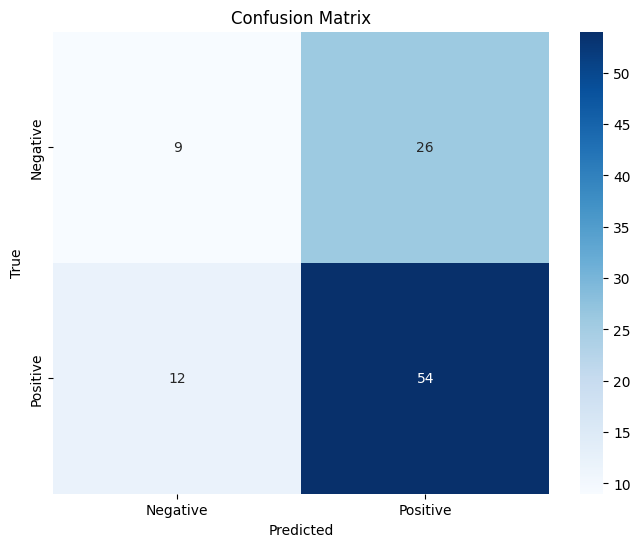

In [219]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Call the test function to get the necessary components
test_loss, true_labels, predicted_labels = test()

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()